In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from datetime import timedelta, datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [2]:
# Look at sub-region single example
dom_df = pd.read_csv('/kaggle/input/hourly-energy-consumption/DOM_hourly.csv')
dom_df.shape

(116189, 2)

In [3]:
# Read full parquet
energy_df = pd.read_parquet('/kaggle/input/hourly-energy-consumption/est_hourly.paruqet')
energy_df.reset_index(inplace=True)
print(energy_df.shape)
energy_df.tail(5)

(178262, 13)


,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
178261,2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


In [4]:
energy_df.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


Text(0.5, 0, 'MW Usage')

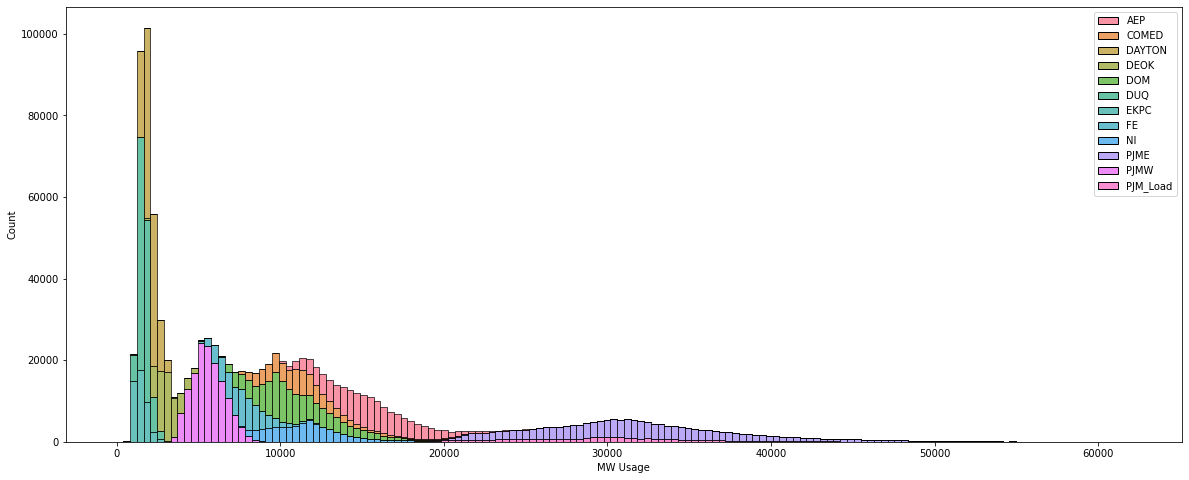

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=energy_df, bins=150, ax=ax, multiple='stack')
ax.set_xlabel("MW Usage")

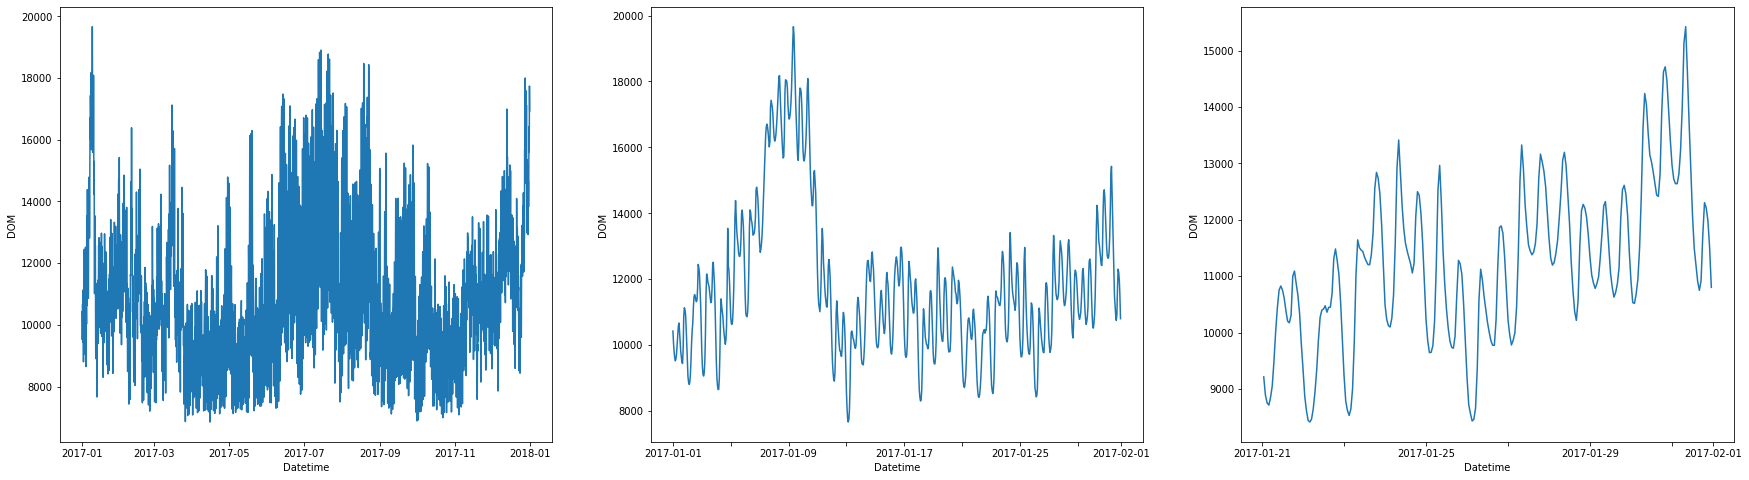

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
dom_energy = energy_df[['Datetime', 'DOM']]
mask = dom_energy['Datetime'].dt.year == int(2017)
dom_energy_2017 = dom_energy[mask]
mask = dom_energy_2017['Datetime'].dt.month == int(1)
dom_march_2017 = dom_energy_2017[mask]
#week_prior =  datetime(2017, 3, 24) - timedelta(days=1)
dom_ten_day = dom_march_2017[dom_march_2017['Datetime'] > datetime(2017, 1, 21)]
#dom_energy_2017.sample(20)
ax[0] = sns.lineplot(data=dom_energy_2017, x="Datetime", y="DOM", ax=ax[0])
ax[1] = sns.lineplot(data=dom_march_2017, x="Datetime", y="DOM", ax=ax[1])
for index, label in enumerate(ax[1].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax[2] = sns.lineplot(data=dom_ten_day, x="Datetime", y="DOM", ax=ax[2])
for index, label in enumerate(ax[2].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

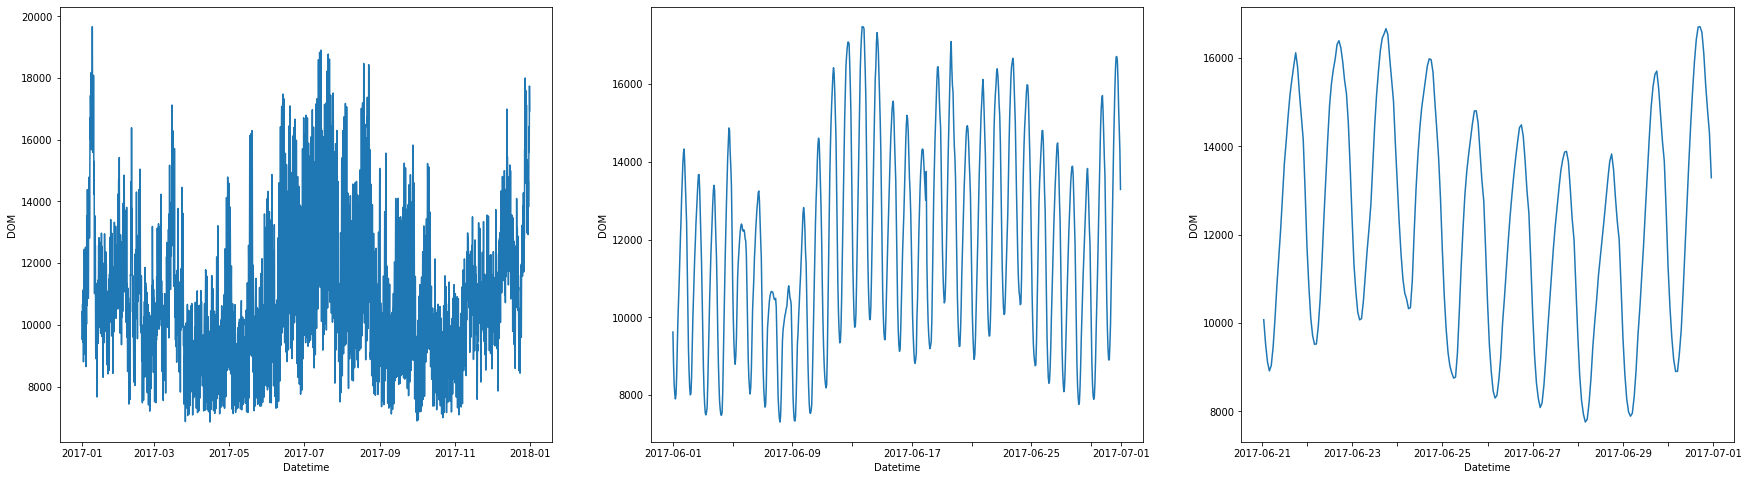

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
dom_energy = energy_df[['Datetime', 'DOM']]
mask = dom_energy['Datetime'].dt.year == int(2017)
dom_energy_2017 = dom_energy[mask]
mask = dom_energy_2017['Datetime'].dt.month == int(6)
dom_march_2017 = dom_energy_2017[mask]
#week_prior =  datetime(2017, 3, 24) - timedelta(days=1)
dom_ten_day = dom_march_2017[dom_march_2017['Datetime'] > datetime(2017, 6, 21)]
#dom_energy_2017.sample(20)
ax[0] = sns.lineplot(data=dom_energy_2017, x="Datetime", y="DOM", ax=ax[0])
ax[1] = sns.lineplot(data=dom_march_2017, x="Datetime", y="DOM", ax=ax[1])
for index, label in enumerate(ax[1].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax[2] = sns.lineplot(data=dom_ten_day, x="Datetime", y="DOM", ax=ax[2])
for index, label in enumerate(ax[2].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

In [8]:
energy_df['dow'] = energy_df['Datetime'].dt.dayofweek
energy_df['doy'] = energy_df['Datetime'].dt.dayofyear
energy_df['year'] = energy_df['Datetime'].dt.year
energy_df['month'] = energy_df['Datetime'].dt.month
energy_df['quarter'] = energy_df['Datetime'].dt.quarter
energy_df['hour'] = energy_df['Datetime'].dt.hour
energy_df['weekday'] = energy_df['Datetime'].dt.day_name()
energy_df['woy'] = energy_df['Datetime'].dt.isocalendar().week
energy_df['dom'] = energy_df['Datetime'].dt.day # Day of Month
energy_df['date'] = energy_df['Datetime'].dt.date

In [9]:
energy_df.sample(20)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,...,dow,doy,year,month,quarter,hour,weekday,woy,dom,date
134010,2013-06-18 03:00:00,13034.0,9532.0,1752.0,2784.0,8961.0,1423.0,1076.0,6517.0,NaN,...,1,169,2013,6,2,3,Tuesday,25,18,2013-06-18
67508,2005-01-19 13:00:00,20583.0,NaN,2633.0,NaN,NaN,1975.0,NaN,NaN,13320.0,...,2,19,2005,1,1,13,Wednesday,3,19,2005-01-19
138786,2014-12-01 04:00:00,11623.0,9593.0,1475.0,2148.0,7992.0,1209.0,970.0,6180.0,NaN,...,0,335,2014,12,4,4,Monday,49,1,2014-12-01
113030,2011-11-09 18:00:00,15920.0,12579.0,2058.0,NaN,10564.0,1739.0,NaN,8181.0,NaN,...,2,313,2011,11,4,18,Wednesday,45,9,2011-11-09
135181,2013-05-01 22:00:00,15640.0,12859.0,2102.0,3321.0,9602.0,1623.0,NaN,8093.0,NaN,...,2,121,2013,5,2,22,Wednesday,18,1,2013-05-01
161400,2016-05-03 09:00:00,13692.0,10461.0,1941.0,2782.0,9883.0,1402.0,1199.0,7610.0,NaN,...,1,124,2016,5,2,9,Tuesday,18,3,2016-05-03
165323,2017-11-22 21:00:00,16077.0,11968.0,2241.0,3325.0,11278.0,1632.0,1836.0,7983.0,NaN,...,2,326,2017,11,4,21,Wednesday,47,22,2017-11-22
168745,2017-07-02 10:00:00,13670.0,9603.0,1773.0,3010.0,12473.0,1687.0,1342.0,7014.0,NaN,...,6,183,2017,7,3,10,Sunday,26,2,2017-07-02
158127,2016-09-18 00:00:00,13210.0,10841.0,1735.0,2998.0,10361.0,1618.0,1283.0,7103.0,NaN,...,6,262,2016,9,3,0,Sunday,37,18,2016-09-18
18476,2000-08-23 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,236,2000,8,3,2,Wednesday,34,23,2000-08-23
